**Dataset Details :**
- `Avg. Session Length`: Average session of in-store style advice sessions in minutes.
- `Time on App`: Average time spent on App in minutes.
- `Time on Website`: Average time spent on Website in minutes.
- `Length of Membership`: How many years the customer has been a member.
- `Yearly Amount Spent`: The total amount the customer is spending in dollars.

## Import libraries:

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Reading dataset:

In [5]:
df = pd.read_csv('Ecommerce_Customers.csv')

## First five customer data:

In [7]:
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Data structure:

In [9]:
## like dtype, length of columns and rows dataset having
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [10]:
## dataset shape:
print('Dataset shape : ', df.shape)

Dataset shape :  (500, 8)


## Removing unwanted columns:

In [12]:
df.drop(columns=['Email', 'Address', 'Avatar'], inplace=True)

In [13]:
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


## Identifying and handdling missing and duplicate values:

In [15]:
## Check missing values:
print('Missing values : ')
print(df.isnull().sum())

Missing values : 
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [16]:
## Check duplicate values:
print('Duplicate values : ', df.duplicated().sum())

Duplicate values :  0


**Obsevation :** There is no missing and duplicate values.

**Conclusion :** **No additional cleaning steps** are required for missing values or duplicates.

## Some statistical info:

In [19]:
df.describe()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Obsevation :** 

**1. General Observations:**
- The dataset contains **500 rows** for each column, confirming no missing values.
- **Mean and Median:** 
  - For `Time on App`, the mean is **12.05**, and the median is **11.98**.
  - For `Time on Website`, the mean is **37.06**, and the median is **37.06**.
  - And for `Yearly Amount Spent`, the mean is **499.31**, and the median is **498.88**.

It shows the `mean` and `median` are fairly close for all columns, indicating a roughly symmetric distribution without significant skewness.

- **Standard Deviation:**
  - The **std** values are quite same for `Time on App`(0.99) and `Time on Website`(1.01), suggesting consistency in spending both app and websites over time.

- **Minimum and Maximum Values:**
  - Spending time ranges :
    - `Time on App` ranges from **8.50**m to **15.12**m.
    - `Time on Website` ranges from **33.91**m to **40.00**m.

This wide range indicates both app and website activity, possibly influenced by some `Sale` events. (like amazon-'greate indian sale', flipkart-'big billion sale')

- **Interquartile Range (IQR):**
  - The 25 to 75% range (`Q1` to `Q3`) for `Time on App` is **11.38 to 12.75** and `Time on Website` is **36.34 to 37.71**, showing that most of spending time within this range.
  - Outliers beyond this range may affect to model.


## Outlier detection:

**Visualize outliers using boxplot :**

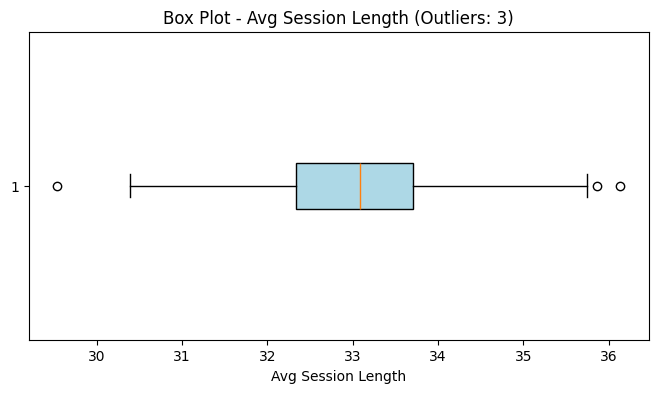

Column 'Avg Session Length' Outliers: [29.53242897 36.13966249 35.86023651]


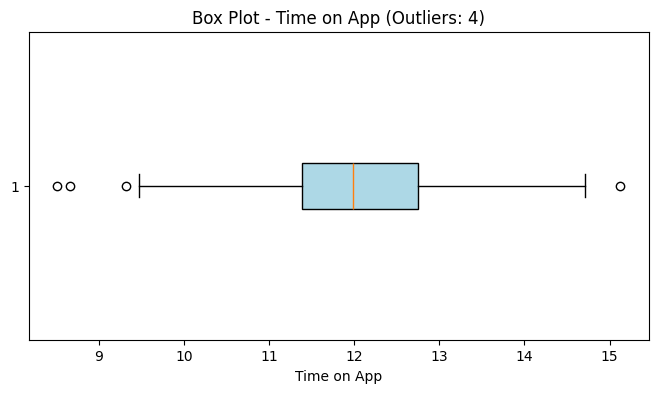

Column 'Time on App' Outliers: [15.12699429  8.50815218  9.3162892   8.66834952]


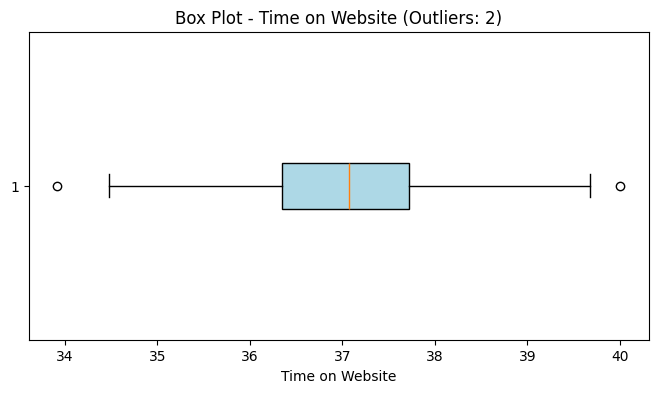

Column 'Time on Website' Outliers: [40.00518164 33.91384725]


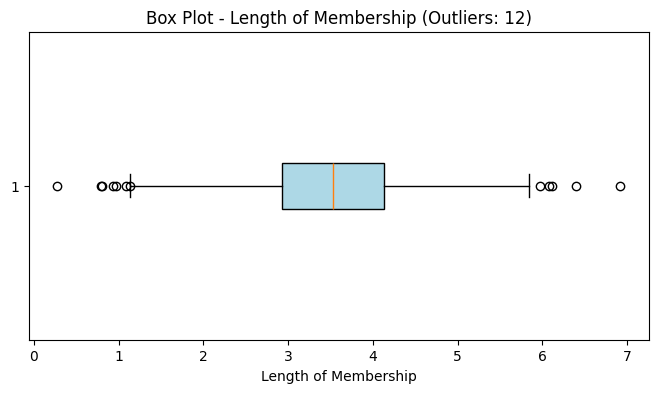

Column 'Length of Membership' Outliers: [5.97676813 6.40122884 6.07665364 6.92268934 0.96862212 0.80151572
 0.78951991 1.0845853  1.13047696 6.11519895 0.9364976  0.26990109]


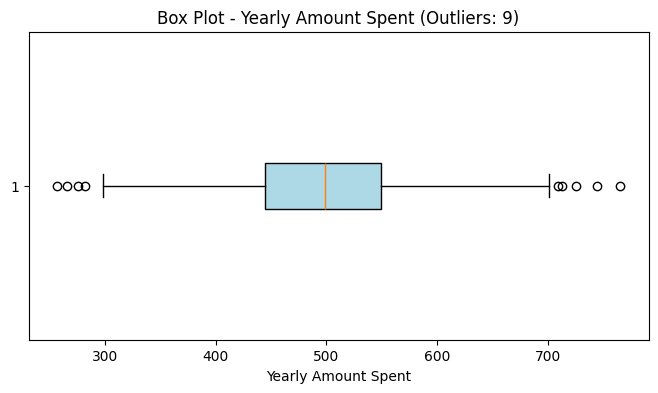

Column 'Yearly Amount Spent' Outliers: [725.58481406 765.51846194 744.2218671  712.39632681 256.67058229
 282.47124572 266.08634095 708.93518487 275.91842065]


In [23]:
##Extracting numerical columns:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Box plot with adjusted axis for tightly clustered data
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    
    # Calculate outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Display outlier values in the title
    plt.title(f'Box Plot - {column} (Outliers: {len(outliers)})', fontsize=12)
    plt.xlabel(column)
    plt.show()

    # Print the actual outlier values
    if len(outliers) > 0:
        print(f"Column '{column}' Outliers: {outliers[column].values}")


**Observations from Outlier Analysis:**

**1. Avg Session Length:**
   - **Outliers Identified**: 3  
   - **Details**: Outliers 29.53242897, 36.13966249, 35.86023651.  

**2. Time on App:**
   - **Outliers Identified**: 4  
   - **Details**: Outliers are 15.12699429,  8.50815218,  9.3162892,   8.66834952.

**3. Time on Website:**
   - **Outliers Identified**: 2
   - **Details**: Outliers 40.00518164 33.91384725.  

**4. Length of Membership:**
   - **Outliers Identified**: 12 
   - **Details**: Outliers are 5.97676813, 6.40122884, 6.07665364, 6.92268934, 0.96862212, 0.80151572,
 0.7895199,1 1.084585,3  1.1304769,6 6.1151989,  0.936497,6  0.26990109.  

**5. Yearly Amount Spent:**
   - **Outliers Identified**:93  
   - **Details**: Outliers725.58481406, 765.51846194, 744.2218671,  712.39632681, 256.67058229,
 282.4712457,2 266.0863409,5 708.9351848,7 275.918420652.  

---


In [25]:
##Coping the dataset for the future coparision:
df1 = df.copy()

**Handle Outliers :**

In [27]:
# creating a function for capping outliers based on IQR:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the values instead of removing rows
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping to all numerical columns:
for col in numerical_columns:
    cap_outliers(df, col)
print("\033[1mCapping applied to numerical columns.\033[0m")

Capping applied to numerical columns.


In [28]:
## Verifying all outliers handdled or not:
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    remaining_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(remaining_outliers)} remaining outliers")

Avg Session Length: 0 remaining outliers
Time on App: 0 remaining outliers
Time on Website: 0 remaining outliers
Length of Membership: 0 remaining outliers
Yearly Amount Spent: 0 remaining outliers


In [29]:
# Display total number of rows before and after outlier handling:
before_outliers = len(df1)
after_outliers = len(df)

print(f"\033[1mTotal number of rows before outlier handling:\033[0m {before_outliers}")
print(f"\033[1mTotal number of rows after outlier handling:\033[0m {after_outliers}")
print(f"\033[1mTotal rows removed:\033[0m {before_outliers - after_outliers}")

Total number of rows before outlier handling: 500
Total number of rows after outlier handling: 500
Total rows removed: 0


**Outlier Handling Technique**
- **Technique Used**: **Capping (IQR Method)**  
   - **Why**:    
     - Capping allows us to limit the effect of these extreme values without eliminating the rows, preserving the dataset size while normalizing the influence of outliers.
     - By completely removing outliers may lead to the loss of critical information.
     - The IQR method is appropriate because it adjusts for variability while retaining the core distribution of the data.

## Final dataset validation:

In [32]:
# Check for null values
null_values = df.isnull().sum()

# Check range of values
range_values = df.describe()

print("\033[1mNull Values in Cleaned Data:\033[0m")
print(null_values)

print("\n\033[1mRange of Values in Cleaned Data:\033[0m")
print(range_values)

Null Values in Cleaned Data:
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Range of Values in Cleaned Data:
       Avg Session Length  Time on App  Time on Website  Length of Membership  \
count          500.000000   500.000000       500.000000            500.000000   
mean            33.053771    12.054891        37.060739              3.533629   
std              0.985049     0.982745         1.006895              0.978160   
min             30.286577     9.339609        34.298495              1.136371   
25%             32.341822    11.388153        36.349257              2.930450   
50%             33.082008    11.983231        37.069367              3.533975   
75%             33.711985    12.753850        37.716432              4.126502   
max             35.767230    14.802394        39.767195              5.920580   

       Yearly Amount Spent  
count           500.000000  
mean  

## Visualizations for Additional Insights :

In [34]:
df.columns

Index(['Avg Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

**Histogram**

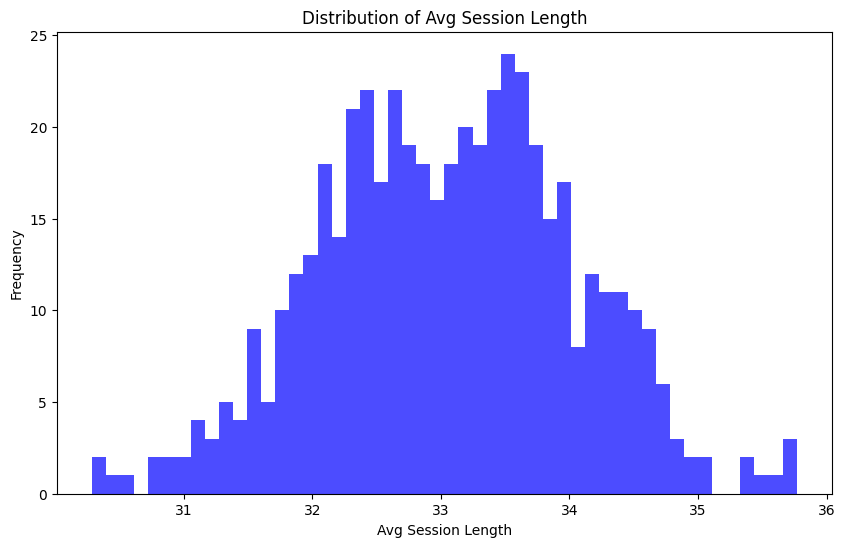

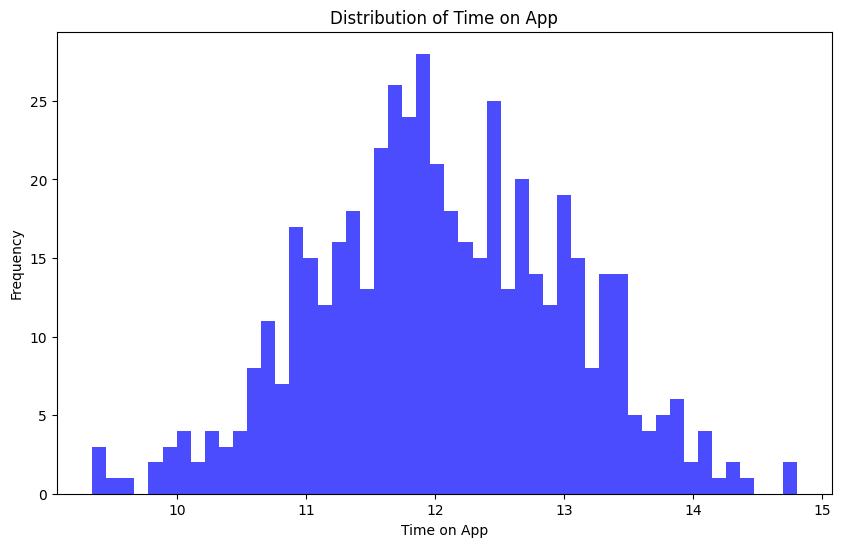

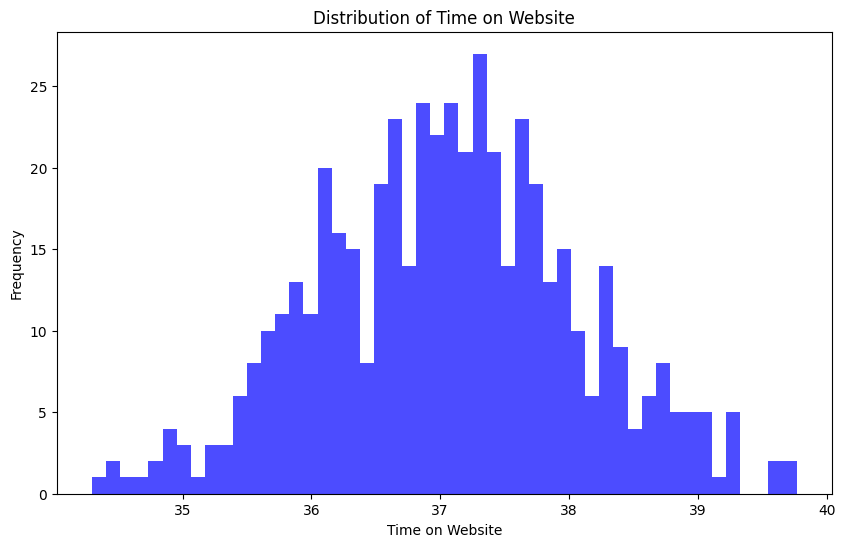

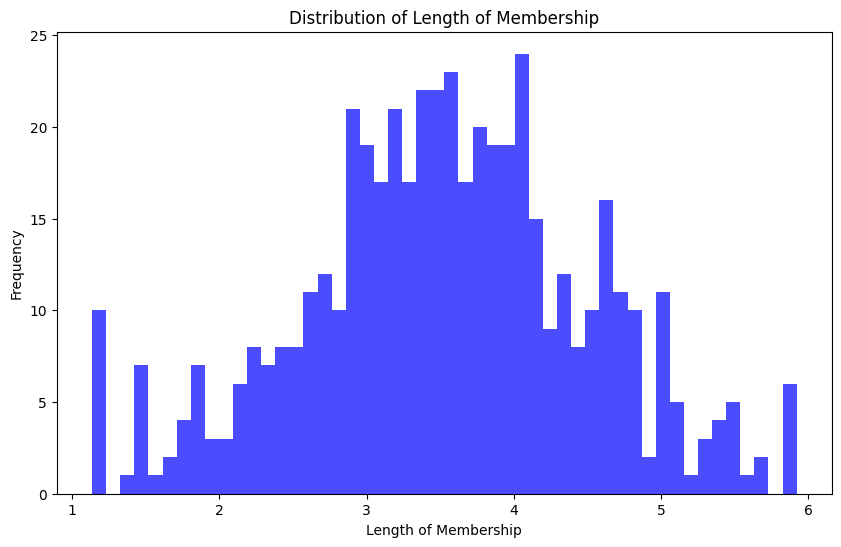

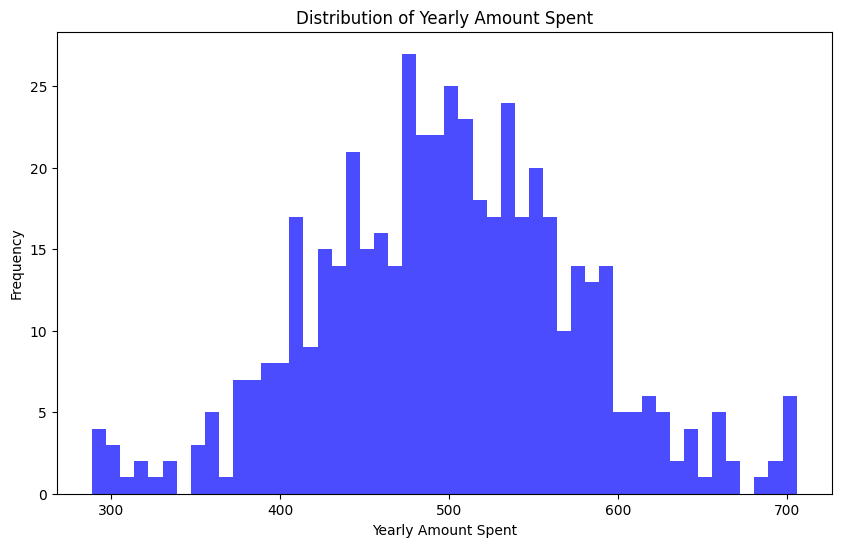

In [60]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=50, color='blue', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**1. Histogram Observation :**
- **Distribution Shape:**
  - All data are approximately normally distributed, centered around **0%**, indicating no consistent positive or negative bias.

- **Spread and Extremes:**
  - `Avg Session Length` have a narrow spread, with most values falling between **31 to 35**.
  - However, a few extreme values are visible beyond **30 and 36**,
  - `Time on App` have same narrow spread, with most values falling between **10.5 to 14**.
  -  few extreme values are visible beyond **9 and 15**,
  -  `Time on Website` with most values falling between **35 to 39**.
  -  few extreme values are visible beyond **34 and 40**,
  -  `Length of Membership` with most values falling between **2 to 5.5**.
  -  extreme values are visible beyond **1 and 6**,
  -  `Yearly Amount Spent` with most values falling between **350 to 650**.
  -  extreme values are visible beyond **250 and 700**,

suggesting significant outliers or extreme `sale` movement (likely due to `online offer sales`).

**Heatmap**(corelation)

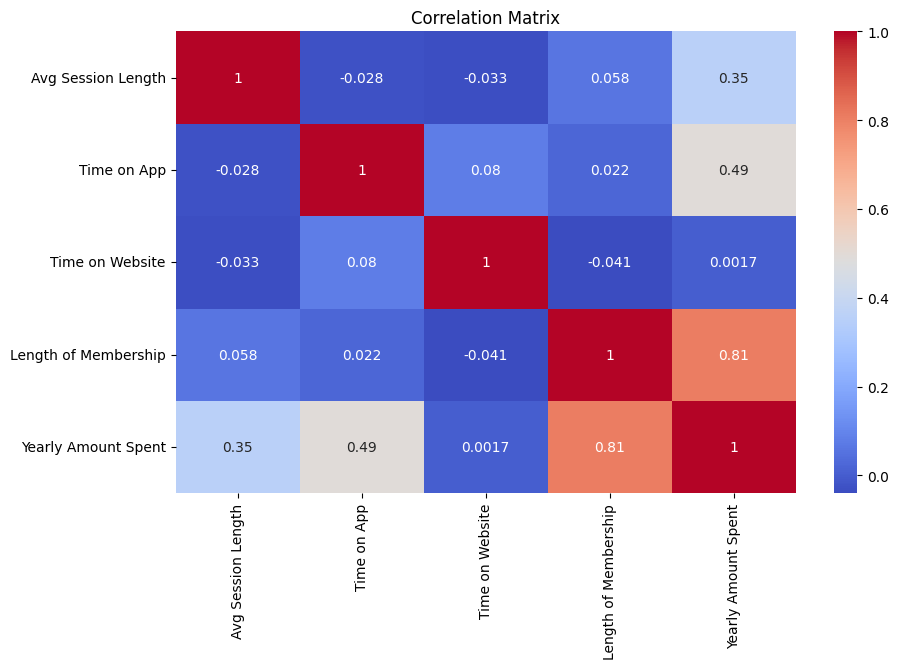

In [68]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Observations from Correlation Analysis:**

1. **High Correlations:**
   - Features like `Length of Membership` with `Yearly Amount Spent`(correlation: `0.81`) and `Time on App` with `Yearly Amount Spent`(correlation:`0.49`) are highly correlated . This indicates that they carry similar information.

2. **Low Correlation Features:**
   - Features like `Time on App` with `Time on Website` and `Time on Website` with `Yearly Amount Spent`, show lower correlations, making them potentially valuable for capturing independent patterns in the data.

3. **Negative corelation Features:**
   - Features like `Time on Website` with `Length of Membership` and `Time on Website` with `Avg Session Length`, show negative correlations.

---


**Scatterplot**

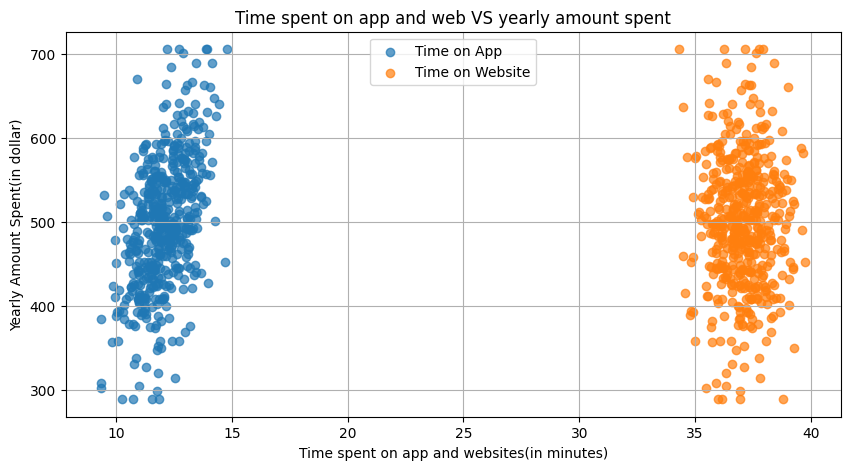

In [105]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Time on App'], df['Yearly Amount Spent'],  label='Time on App', alpha=0.7)
plt.scatter(df['Time on Website'], df['Yearly Amount Spent'],  label='Time on Website', alpha=0.7)
plt.title('Time spent on app and web VS yearly amount spent')
plt.xlabel('Time spent on app and websites(in minutes)')
plt.ylabel('Yearly Amount Spent(in dollar)')
plt.legend(loc='upper center')
plt.grid(True)
plt.show()

**Observation :**

More time spent on `web` as compare to `app` returns same sale yearly amount.

## Feature Engineering:

In [110]:
## Standardscaler
ss = StandardScaler()

**Why?**

 - Improves Model Performance.
 - large values can dominate the model's learning process.
 - some algorithm converge faster when data is standardized.

**Transforming data**

In [122]:
arr = ss.fit_transform(df[df.columns])
arr

array([[ 1.46687436,  0.61192073,  2.50219694,  0.56181113,  1.13662977],
       [-1.14575886, -0.96299343,  0.20700135, -0.88990136, -1.37041267],
       [-0.05371219, -0.73807396,  0.04956686,  0.58424563, -0.14930099],
       ...,
       [-0.41358557, -0.56580099,  1.26439314,  1.45790252,  0.67131721],
       [ 0.27308223,  0.34278398, -0.21936146, -1.22509963, -0.54733622],
       [ 0.67293454,  0.37067805, -1.28217342, -0.8171151 , -0.01826445]],
      shape=(500, 5))

In [124]:
df[df.columns] = arr

**Before VS After**

In [145]:
print('\033[1mBefore standardization : \033[0m\n', df1.head(), '\n')
print('\033[1mAfter standardization : \033[0m\n', df.head())

Before standardization : 
    Avg Session Length  Time on App  Time on Website  Length of Membership  \
0           34.497268    12.655651        39.577668              4.082621   
1           31.926272    11.109461        37.268959              2.664034   
2           33.000915    11.330278        37.110597              4.104543   
3           34.305557    13.717514        36.721283              3.120179   
4           33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092   

After standardization : 
    Avg Session Length  Time on App  Time on Website  Length of Membership  \
0            1.466874     0.611921         2.502197              0.561811   
1           -1.145759    -0.962993         0.207001             -0.889901   
2           -0.053712    -0.738074         0.049567              0.584246   
3            1.272058   

## Final dataset:

In [148]:
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,1.466874,0.611921,2.502197,0.561811,1.136630
1,-1.145759,-0.962993,0.207001,-0.889901,-1.370413
2,-0.053712,-0.738074,0.049567,0.584246,-0.149301
3,1.272058,1.693510,-0.337469,-0.423105,1.058520
4,0.281386,0.754050,0.473129,0.933991,1.283342
